# Finding Elastic Modulus of Aluminium (FCC)

## Importing Libraries

In [1]:
#importing required libraries
import sys;sys.path.append('/home/krish/elastic_modulus_python_md/')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from classes.constantsmd import *
from classes.functionsmd import *#(forceLJ3FCC, forceXLJ3, forceYLJ3, forceZLJ3, verlet_pos, writeXYZFile, numberOfAtoms, r, TimeGridAndForceGrid)
from classes.gridmd import (N_steps, makeLattice, makeLatticePos, plotPosGrid,
                            plotStructure)
print("-----------start-----------")

called constantmd
called gridmd
called functionsmd
-----------start-----------


## Initial Assignment

In [2]:
brick = np.array([
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ],

    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],

    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]            ])
#brick = np.multiply(0.5,brick)
N = np.array([3, 3, 3])
#%%
latticeGrid = makeLattice(brick, N[0], N[1], N[2])
posGrid = makeLatticePos(brick, N[0], N[1], N[2], ial/2)
#writeXYZFile(latticeGrid, posGrid,name='temp.xyz')
# plotPosGrid(posGrid)
#%%
N[0] = posGrid.shape[0]
N[1] = posGrid.shape[1]
N[2] = posGrid.shape[2]

## Determining Position and Force for each timestep

In [3]:
time_grid, force_grid = TimeGridAndForceGrid(posGrid, latticeGrid)

In [4]:
numberOfAtoms(latticeGrid)

172

## Assigning Force Along X-Axis

## Assigning Atomospheric Pressure

## Displaying Position of Atoms along the timeline

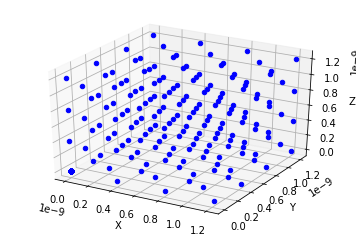

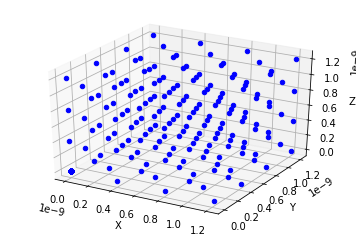

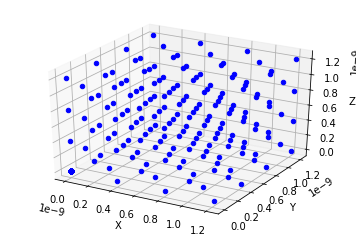

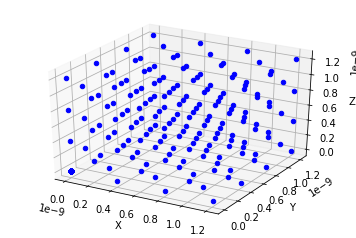

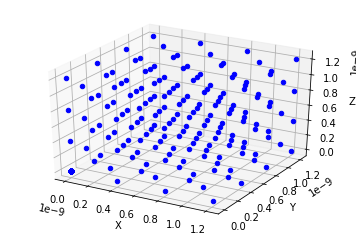

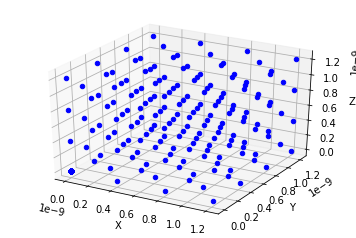

In [5]:
for t in range(N_steps):
    plotPosGrid(time_grid[t])

## Calculating the Mean Force and Stress

In [6]:
time_forceMean, time_stress, time_stress_applied = timeForceMeanAndTimeStress(force_grid, time_grid)

In [7]:
time_forceMean

array([[1.16485945e-06, 1.16485945e-06, 1.16485945e-06],
       [1.33126795e-06, 1.33126795e-06, 1.33126795e-06],
       [1.35504059e-06, 1.35504059e-06, 1.35504059e-06],
       [1.35843668e-06, 1.35843668e-06, 1.35843668e-06],
       [1.35892184e-06, 1.35892184e-06, 1.35892184e-06],
       [1.35899114e-06, 1.35899114e-06, 1.35899114e-06]])

## Calculating End Strain

In [8]:
endStrain = myStrain(time_grid, latticeGrid)
#abs(time_grid[1,0,0,2,0]-time_grid[1,N[0]-1,0,2,0])/abs(time_grid[0,0,0,0,0]-time_grid[0,N[0]-1,0,0,0])

/home/krish/elastic_modulus_python_md/classes/functionsmd.py:305: RuntimeWarning: invalid value encountered in double_scalars
  tempMat[j,k] = abs(time_grid[t,0,j,k,0]-time_grid[t,N[0]-1,j,k,0])/abs(time_grid[0,0,j,k,0]-time_grid[0,N[0]-1,j,k,0])


In [9]:
endStrain[:,0]

array([0.51020408, 0.51029315, 0.51047129, 0.51073849, 0.51109476,
       0.5115401 ])

## Determining the Strain

In [10]:
time_strainXYZ = StrainXYZ(time_grid)

## Strain-Time Diagram

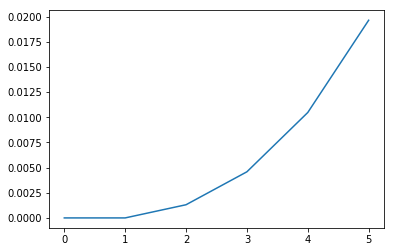

In [11]:
time_strainMean = timeStrainMean(time_grid, latticeGrid)
plt.plot(range(N_steps) ,time_strainMean[:,0])

In [12]:
refStrain = np.zeros([N_steps,3])
for t in range(N_steps):
    refStrain[t,0] = np.mean(time_strainXYZ[t,:,:,:,0])
    refStrain[t,1] = np.mean(time_strainXYZ[t,:,:,:,1])
    refStrain[t,2] = np.mean(time_strainXYZ[t,:,:,:,2])
print(time_strainMean-refStrain)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00065294 0.00065294 0.00065294]
 [0.00294204 0.00294204 0.00294204]
 [0.00752216 0.00752216 0.00752216]
 [0.01504814 0.01504814 0.01504814]]


## Stress-Time Diagram

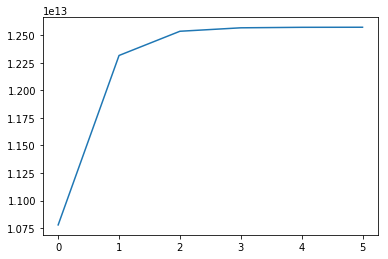

In [13]:
plt.plot(range(N_steps) ,time_stress[:,0])

In [14]:
time_stress

array([[1.07782050e+13, 1.07782050e+13, 1.07782050e+13],
       [1.23179485e+13, 1.23179485e+13, 1.23179485e+13],
       [1.25379119e+13, 1.25379119e+13, 1.25379119e+13],
       [1.25693352e+13, 1.25693352e+13, 1.25693352e+13],
       [1.25738243e+13, 1.25738243e+13, 1.25738243e+13],
       [1.25744656e+13, 1.25744656e+13, 1.25744656e+13]])

## Stress-Strain Diagram

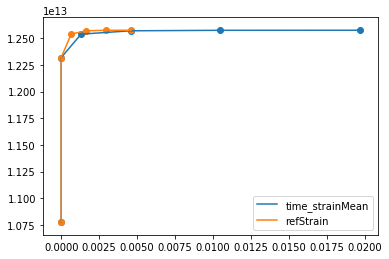

In [15]:
n=N_steps
#fig, axs = plt.subplot(1,2)

plt.plot(time_strainMean[:n,0], time_stress[:n,0])
plt.plot(refStrain[:n,0], time_stress[:n,0])
plt.gca().legend(('time_strainMean','refStrain'))
#plt.show()
plt.scatter(time_strainMean[:n,0], time_stress[:n,0])
plt.scatter(refStrain[:n,0], time_stress[:n,0])
plt.gca().legend(('time_strainMean','refStrain'))
plt.show()

In [16]:
for t in range(N_steps):
    print(endStrain[t,0],'\t',time_strainMean[t,0],'\t', refStrain[t,0])

0.5102040816326531 	 0.0 	 0.0
0.5102931496311641 	 0.0 	 0.0
0.5104712856281864 	 0.0013096961261149693 	 0.0006567572410838915
0.5107384896237196 	 0.0045839364414023915 	 0.0016418931027097287
0.511094761617764 	 0.010477569008919762 	 0.0029554075848775107
0.5115401016103195 	 0.01964544189172456 	 0.004597300687587238


## Stress/Strain Value

In [17]:
for i in range(N_steps):
    print((time_stress[i,0]/time_strainMean[i,0])/1e9, '\t', (time_stress[i,0]/refStrain[i,0])/1e9, '\t', (time_stress[i,0]/endStrain[i,0])/1e9, "GPa")

inf 	 inf 	 21125.281715733843 GPa
inf 	 inf 	 24138.965085455493 GPa
9573145.738741158 	 19090633.653419863 	 24561.443986676262 GPa
2742039.5957726194 	 7655391.941220995 	 24610.11942939859 GPa
1200070.7668373594 	 4254514.44987302 	 24601.74750241202 GPa
640070.3856417794 	 2735184.496783188 	 24581.583199743483 GPa


/home/krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


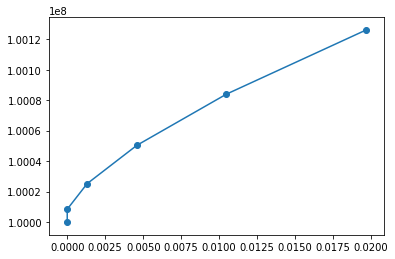

inf GPa
inf GPa
152.3015892134512 GPa
60.93597228054186 GPa
33.86468338033194 GPa
21.779291725201677 GPa


/home/krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [18]:
n=N_steps
#fig, axs = plt.subplot(1,2)

plt.plot(time_strainMean[:n,0], time_stress_applied[:n,0])
plt.scatter(time_strainMean[:n,0], time_stress_applied[:n,0])
plt.show()
for i in range(N_steps):
    print( (time_stress_applied[i,0]/refStrain[i,0])/1e9,"GPa")

In [19]:
# for t in range(N_steps):
#     plotPosGrid(time_gridUser[t])

## Completion Alert

In [20]:
import platform
platform.system()
if(platform.system()=='Windows'):
    import winsound
    duration = 1000  # millisecond
    freq = 440  # Hz
    winsound.Beep(freq, duration)
if(platform.system()=='Linux'):
    import os
    os.system('spd-say "your program is finished"')


## Program End

In [21]:
print("------------end------------")

------------end------------
